In [1]:
#importing sklearn and traditional Python machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# importing keras, tensorflow and related modules
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential # intitialize the ANN
from keras.layers import Dense, Dropout      # create layers
from keras.optimizers import Adam, SGD, RMSprop

In [2]:
#Loading the dataset
diabetes_data = pd.read_csv("diabetes.csv")

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_data.shape

(768, 9)

In [6]:
## gives information about the data types,columns, null value counts, memory usage etc
## function reference : https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html


diabetes_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# checking whether there are any missing values in the dataset.
diabetes_data.isnull().values.any()

False

### Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.

In [8]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

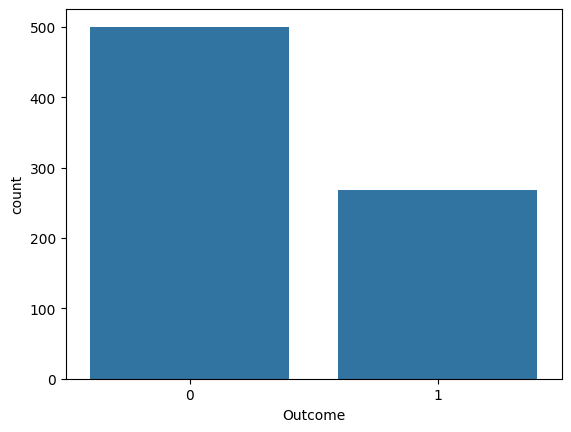

In [9]:
sns.countplot(x = 'Outcome' , data = diabetes_data)

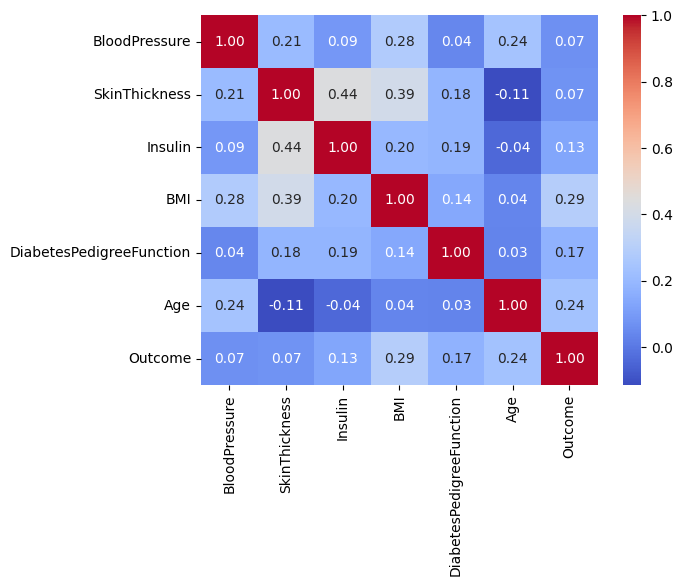

In [14]:
#plt.figure(figsize=(9,8))
sns.heatmap(data=diabetes_data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

### The resulting heatmap shows a color-coded matrix where each cell represents the correlation between two features. Positive correlations are shown in red, while negative correlations are shown in blue. The strength of the correlation is indicated by the intensity of the color. The values inside each cell indicate the actual correlation coefficient, ranging from -1 (perfect negative correlation) to +1 (perfect positive correlation). A value of 0 indicates no correlation between the two features.

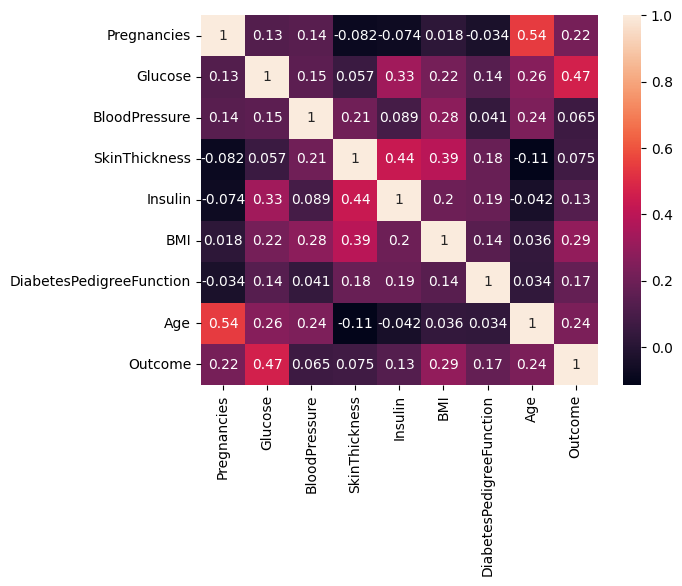

In [15]:
corr_mat = diabetes_data.corr()
sns.heatmap(corr_mat , annot=True)
plt.show() 

In [16]:
# scale all the columns except the 'outcome'
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
scaler.fit_transform(diabetes_data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [17]:
# defining variables X and Y. Y variable has the target value and X variable has other features in the dataset. 
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data["Outcome"].values

In [18]:
# defining variables X and Y. Y variable has the target value and X variable has other features in the dataset. 
X = diabetes_data.iloc[:, :-1].values
y = diabetes_data["Outcome"].values

In [20]:
# splitting the data into train and test data in the ratio 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#return X_train, X_test, y_train, y_test

(537, 8) (537,) (231, 8) (231,)


In [21]:
# defining all functions used in the project

#this function is used to plot auc-roc curve
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes dataset'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

#function used to fit the training data into the model  
def train_clf(clf, X_train, y_train):
    
    return clf.fit(X_train, y_train)
    
#function used to predict the outcome and return f1 score   
def pred_clf(clf, features, target):
    
   y_pred = clf.predict(features)
   return f1_score(target.values, y_pred, pos_label = 1)


def train_predict(clf, X_train, y_train, X_test, y_test):
    
    train_clf(clf, X_train, y_train)
    
    print("F1 score for training set is: {:.4f}".format(pred_clf(clf, X_train, y_train)))
    print("F1 score for testing set is: {:.4f}\n".format(pred_clf(clf, X_test, y_test)))
    


In [22]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [23]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('Accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('ROC-AUC is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))


Accuracy is 0.749
ROC-AUC is 0.803


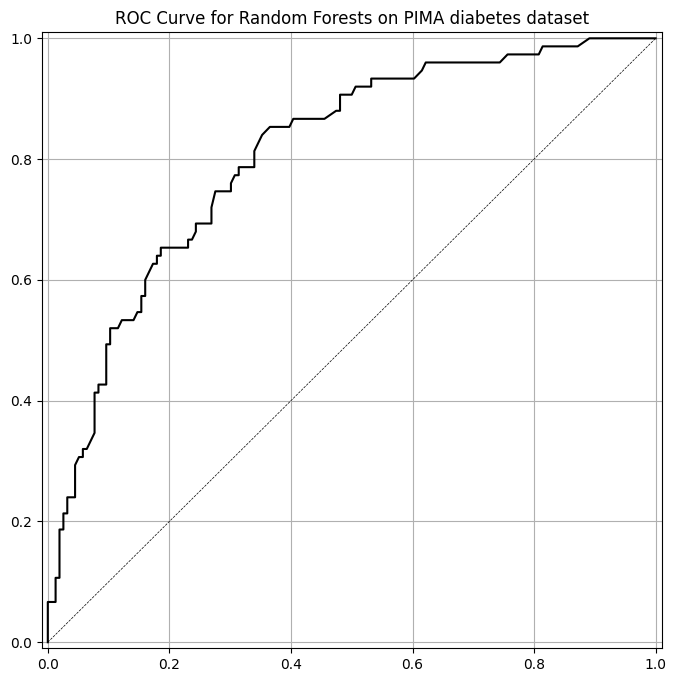

In [23]:
plot_roc(y_test, y_pred_prob_rf[:, 1], 'Random Forests')

#### Accuracy obtained is 72.3 % and AUC-ROC value is 0.81 by employing Random Forest Model. 

#Using KNN algorithm
K-Nearest neighbor classifier is a popular algorithm useful for classification problems.

K-nearest neighbor algorithm predicts the class of the data point as per the majority of the votes obtained from the neighboring points and calculates distance such as Euclidean distance, hamming distance, cosine distance etc. Based on the votes, label is assigned to the new data point which needs to be predicted.

In [24]:
ds_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [25]:
X = diabetes_data.iloc[:, 0:8]
y = diabetes_data.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11111, test_size=0.3)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(537, 8) (537,) (231, 8) (231,)


In [26]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [27]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')

In [28]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
# Evaluate Model
from sklearn.metrics import f1_score
evaluate_cm = confusion_matrix(y_test, y_pred)
print (evaluate_cm)
print(f1_score(y_test, y_pred))

[[127  23]
 [ 34  47]]
0.6225165562913907


In [31]:
# creating the confusion matrix
evaluate_cm = confusion_matrix(y_test, y_pred)
print (evaluate_cm)
print('F1 score is ' ,f1_score(y_test, y_pred))
print('Accuracy is' , accuracy_score(y_test, y_pred))

[[127  23]
 [ 34  47]]
F1 score is  0.6225165562913907
Accuracy is 0.7532467532467533


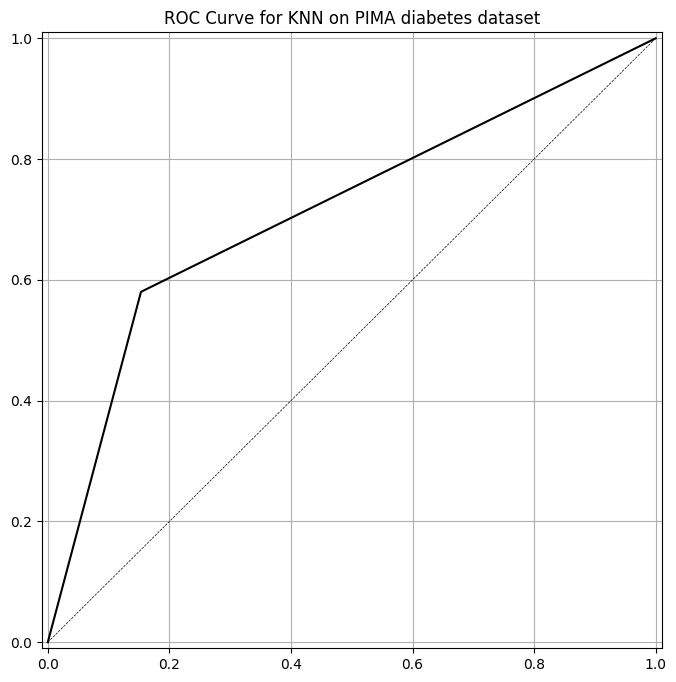

In [33]:
plot_roc(y_test, y_pred, 'KNN')

#### Accuracy score obtained from KNN method = 75.3%

In [32]:
params = {'max_depth':9, 'subsample':0.5, 'learning_rate':0.01, 'min_samples_leaf':1, 'random_state':42}
gbc = GradientBoostingClassifier(n_estimators=290, **params)
clf_ = gbc.fit(X_train, y_train)
y_pred = clf_.predict(X_test)
print('Accuracy is {}'.format(accuracy_score(y_test,y_pred )))
train_predict(gbc, X_train, y_train, X_test, y_test)

Accuracy is 0.7748917748917749
F1 score for training set is: 1.0000
F1 score for testing set is: 0.6623



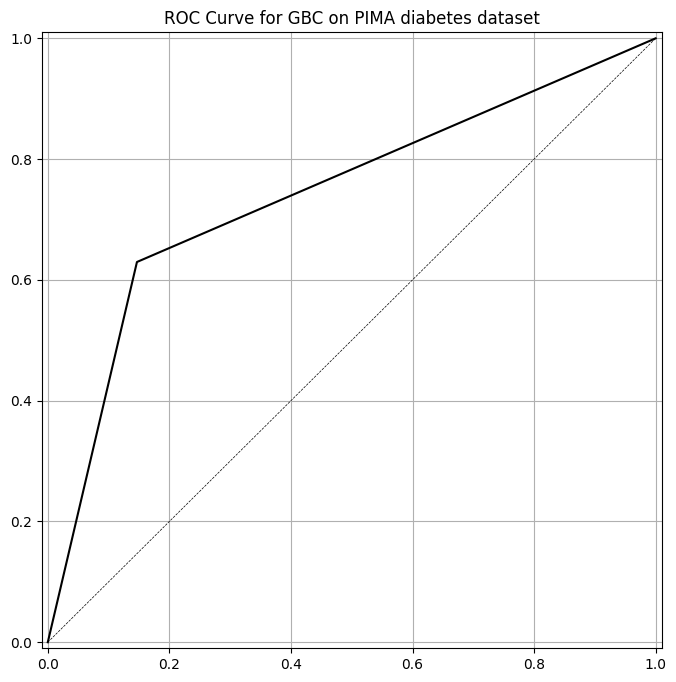

In [34]:
plot_roc(y_test, y_pred, 'GBC')

#### Accuracy obtained by applying Gradient Boosting Classifier is 78.3%